In [1]:
# general imports
import copy
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from IPython.display import display, Latex
# imports for analytical
import XUV_refractive_index as XUV_index
import XUV_signal_computation2 as XUV_sig
import mynumerics as mn
import harmonic_signal as hs

['Ar_Henke', 'Ar_NIST', 'He_Henke', 'He_NIST', 'Kr_Henke', 'Kr_NIST', 'Ne_Henke', 'Ne_NIST', 'Xe_Henke', 'Xe_NIST']


# Monochromatisation in He, 1600 nm around H400 ($\sim 310~\mathrm{eV}$)

We investigate the monochromatisation scheme in He by 1600-nm laser for the harmonics around the 400th harmonic order. First, we start with the absorption length to determine the generation regime. We use $p=100~\mathrm{mbar}$ as a reference.

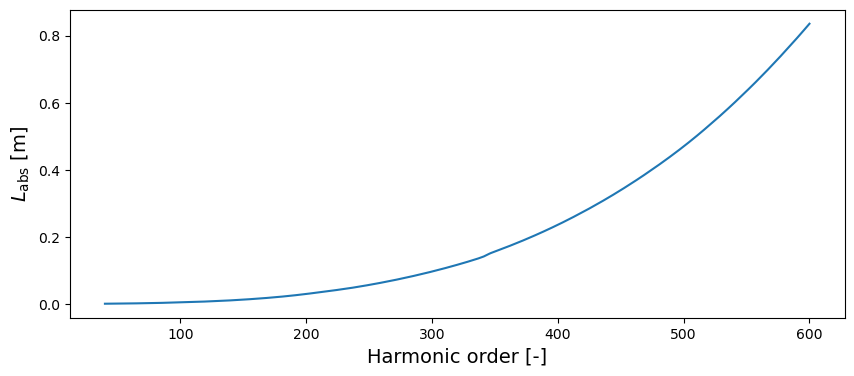

In [2]:
gas_type = 'He'
XUV_table_type_absorption = 'Henke' # {Henke, NIST}    
XUV_table_type_dispersion = 'Henke'
H_opt = 401

# laser  
omegaSI = mn.ConvertPhoton(1600e-9, 'lambdaSI', 'omegaSI') 
pressure = 100e-3


parameters = {'XUV_table_type_dispersion': XUV_table_type_dispersion,
              'XUV_table_type_absorption': XUV_table_type_absorption,
              'gas_type': gas_type,
              'omegaSI': omegaSI,
              'Aq' : 1.0}

def asymptotic_signal(p,omega):
    return 4.*((p*parameters['Aq'])**2)*XUV_index.L_abs(omega, pressure, gas_type + '_' + XUV_table_type_absorption)**2

Hgrid_plot = np.linspace(40,600,10000)
fig, ax = plt.subplots(figsize=(10,4))
ax.set_xlabel("Harmonic order [-]", fontsize=14)
ax.set_ylabel("$L_{\mathrm{abs}}$ [m]", fontsize=14)

ax.plot(Hgrid_plot, XUV_index.L_abs(Hgrid_plot*omegaSI, pressure, gas_type + '_' + XUV_table_type_absorption)) #, color="b", alpha=0.5, label="q + 2")

# plt.tight_layout()
# fig.savefig('Labs.pdf')
plt.show()

The number of periods to monochromatise H400 with the phase-jump $\Delta \phi = 2\pi$ is 200. We use a sample setup with the length of a single jet $l_1=100~\mathrm{\mu m}$. Considering these conditions, we are in good conditions for strong monochromatisation, $l_1 \ll L_{\mathrm{abs}}$, and also below the absorption-limited regime bacause even $Ml_1=200l_1 \ll L_{\mathrm{abs}}$.

In [3]:
l1 = 200e-6

## Build-up of the signal with the number of periods, monochromatised harmonic combs, contrasts

We investigate the signal and contrast in our particular case. We also consider different phase-jumps, $\Delta \phi \in \{2\pi, 4\pi, 6\pi\}$, which may reduce the number of periods needed for monochromatisation.

We start with the build-up of the signal for $\Delta \phi = 2\pi$, for H401 and 3 neighbouring harmonics on both sides.

c:\Users\on080773\Documents\GitHub\Monochromatic-HHG-with-BG-beams\XUV_signal_computation2.py:97: RuntimeWarning: divide by zero encountered in scalar divide
  L_coh = np.abs(np.pi/delta_k1)


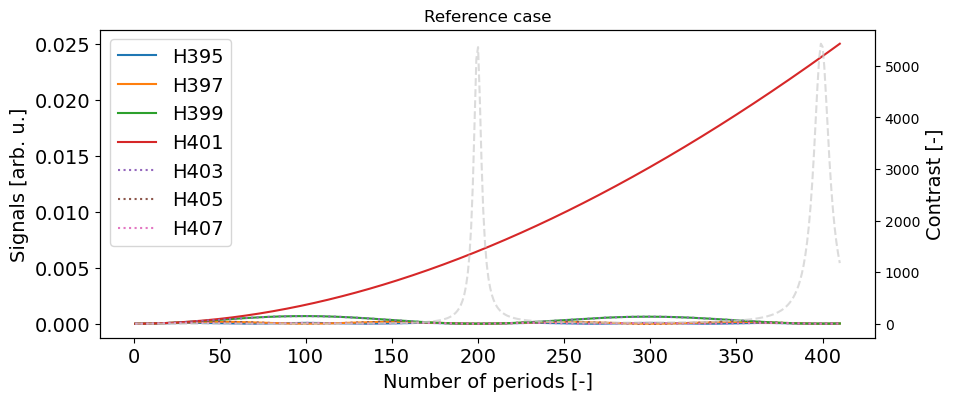

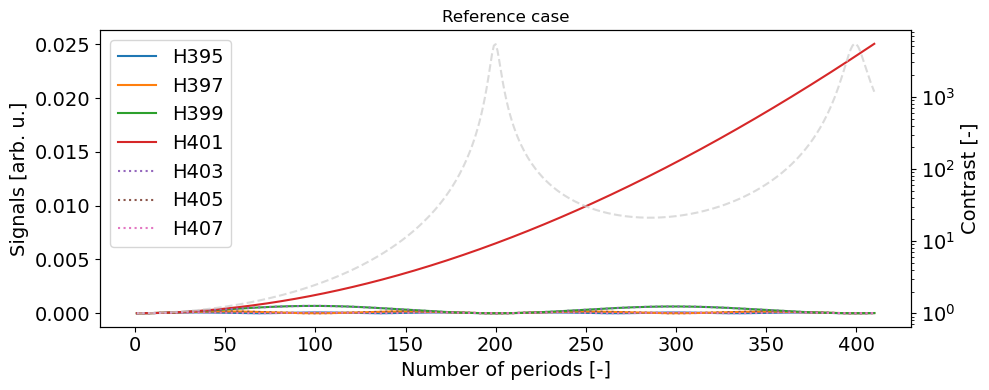

In [5]:
M_max = 410

delta_phi = np.pi/H_opt


# find optimal parameters of generation
eta_opt = XUV_sig.eta_opt(H_opt, parameters)
eta_gen = 0.25*eta_opt

zeta_opt = XUV_sig.zeta_single_segment(pressure, H_opt, eta_gen, parameters)

phase_jumps = [1.,2.,3.]
xi_opt = XUV_sig.xi_calc_pm(-phase_jumps[0]*delta_phi,pressure, l1, zeta_opt, eta_gen, H_opt, parameters)
xi_opt2 = XUV_sig.xi_calc_pm(-phase_jumps[1]*delta_phi,pressure, l1, zeta_opt, eta_gen, H_opt, parameters)
xi_opt3 = XUV_sig.xi_calc_pm(-phase_jumps[2]*delta_phi,pressure, l1, zeta_opt, eta_gen, H_opt, parameters)


H_interest = list(range(H_opt-6,H_opt+7,2))
M_grid = np.arange(1,M_max+1)

H_compare = copy.deepcopy(H_interest)
H_compare.remove(H_opt)

# signals
signal_list = [XUV_sig.periodic_medium_signal(pressure, zeta_opt, l1, xi_opt, eta_gen, H_calc, M_grid, parameters)[1] for H_calc in H_interest]
signal_list2 = [XUV_sig.periodic_medium_signal(pressure, zeta_opt, l1, xi_opt2, eta_gen, H_calc, M_grid, parameters)[1] for H_calc in H_interest]
signal_list3 = [XUV_sig.periodic_medium_signal(pressure, zeta_opt, l1, xi_opt3, eta_gen, H_calc, M_grid, parameters)[1] for H_calc in H_interest]


# plot signals
sig_norm = asymptotic_signal(pressure,H_opt*omegaSI)
line_specifiers = 4*['-']+3*[':']
fig, ax = plt.subplots(figsize=(10,4))
ax.set_xlabel("Number of periods [-]", fontsize=14)
ax.set_ylabel("Signals [arb. u.]", fontsize=14)
ax.tick_params(axis="both", labelsize=14)
for k1 in range(len(H_interest)):
    ax.plot(M_grid, signal_list[k1]/sig_norm, line_specifiers[k1], label= r"H"+str(H_interest[k1]))

ax.legend(fontsize=14)
ax.set_title("Reference case")

fig2, ax2 = copy.deepcopy((fig, ax))

ax_right = ax.twinx()
ax_right.set_ylabel("Contrast [-]", fontsize=14)
ax_right.plot(M_grid, XUV_sig.monochrom_function(H_interest, signal_list, H_opt, H_compare, metric='max'), color='0.8', linestyle='--', alpha=0.7)
ax_right = ax2.twinx()
ax_right.set_ylabel("Contrast [-]", fontsize=14)
ax_right.semilogy(M_grid, XUV_sig.monochrom_function(H_interest, signal_list, H_opt, H_compare, metric='max'), color='0.8', linestyle='--', alpha=0.7)
ax_right.tick_params(axis="both", labelsize=14)

plt.tight_layout()
fig2.savefig("fig 7", dpi=600)
plt.show()

The growth of the 401st harmonic is quadratic-like, which confirms a saturation due to absorption is not reached. The minimum of the neighbouring harmonics is reached for 200 jets, which exactly matches the expected value $q/2$, which is expected in this regime. Next, there are added minima for more distant harmonics ($q/4$ for H397 and H405; and $q/6$ and $2q/6$ for H395 and H407). The $(q \pm 2)$-nd harmonics are overlapping as well as $(q \pm 4)$-th harmonics, this is also expected in this regime because dispersion changes negligibly for close harmonics. Finally, there is also the contrast (in linear or log scale). 

Next, we plot solely the contrasts for $\Delta \phi \in \{2\pi, 4\pi, 6\pi\}$.

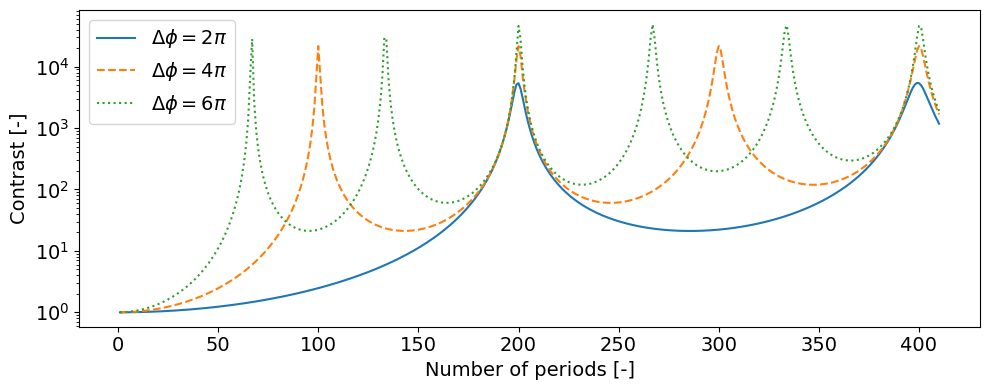

Maximal contrasts
2pi: 5428.849791049092 after 399 jets
4pi: 21619.700818869893 after 400 jets
6pi: 48651.562595010924 after 267 jets


In [6]:
# plot contrasts
H_compare = copy.deepcopy(H_interest)
H_compare.remove(H_opt)

fig, ax = plt.subplots(figsize=(10,4))
ax.set_xlabel("Number of periods [-]", fontsize=14)
ax.set_ylabel("Contrast [-]", fontsize=14)
ax.semilogy(M_grid, XUV_sig.monochrom_function(H_interest, signal_list, H_opt, H_compare, metric='max'), '-', label = r'$\Delta \phi = 2\pi$')
ax.semilogy(M_grid, XUV_sig.monochrom_function(H_interest, signal_list2, H_opt, H_compare, metric='max'), '--',label = r'$\Delta \phi = 4\pi$')
ax.semilogy(M_grid, XUV_sig.monochrom_function(H_interest, signal_list3, H_opt, H_compare, metric='max'), ':', label = r'$\Delta \phi = 6\pi$')
ax.tick_params(axis="both", labelsize=14)
plt.legend(fontsize=14)

plt.tight_layout()
fig.savefig('Fig8.png',dpi=600)
plt.show()

print('Maximal contrasts')
print('2pi:', np.max(XUV_sig.monochrom_function(H_interest, signal_list, H_opt, H_compare, metric='max')), 'after',
      np.argmax(XUV_sig.monochrom_function(H_interest, signal_list, H_opt, H_compare, metric='max'))+1, 'jets')
print('4pi:', np.max(XUV_sig.monochrom_function(H_interest, signal_list2, H_opt, H_compare, metric='max')), 'after',
      np.argmax(XUV_sig.monochrom_function(H_interest, signal_list2, H_opt, H_compare, metric='max'))+1, 'jets')
print('6pi:', np.max(XUV_sig.monochrom_function(H_interest, signal_list3, H_opt, H_compare, metric='max')), 'after',
      np.argmax(XUV_sig.monochrom_function(H_interest, signal_list3, H_opt, H_compare, metric='max'))+1, 'jets')

It shows that the monochromatisation is reached for $q/4$ jets and $\Delta \phi = 4\pi$. For $\Delta \phi = 6\pi$, it is reached for $q/6$ and $2q/6$ jets. This is consistent with the derivation in the main manuscript. These results also show that the contrast is higher for higher phase-jumps; however, we should keep in mind that it still origins from an idealised analytic model. So, the contrast in several orders of magnitude is inherent to the model, but the scheme is perhaps much more sensitive to various parameters to reach such values. Interstingly, the contrast does not grow after 400 periods in contrast with the growth of the signal. The reason is that there is still absoprption that limits the suppression of the non-selected harmonics.

Finally, we compare harmonic combs for the different phase-jumps after $67 \approx q/6$, $100 \approx q/4$ and $200 \approx q/2$ jets.

c:\git\qpm-code\Article Jupyter\XUV_signal_computation2.py:97: RuntimeWarning: divide by zero encountered in divide
  L_coh = np.abs(np.pi/delta_k1)


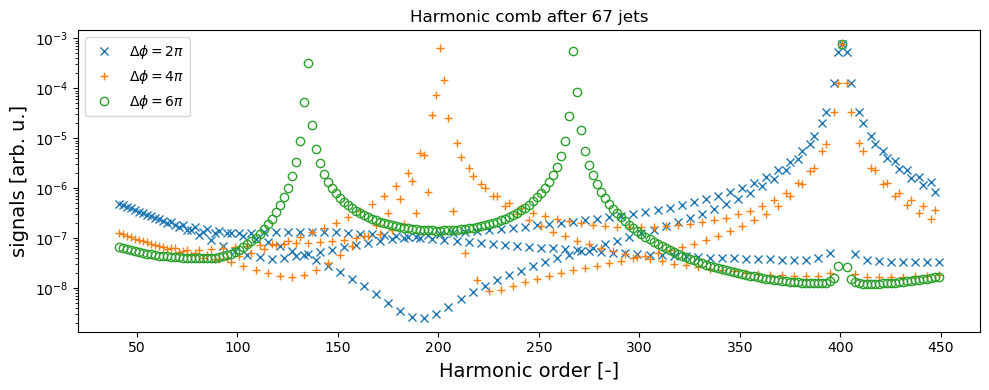

c:\git\qpm-code\Article Jupyter\XUV_signal_computation2.py:97: RuntimeWarning: divide by zero encountered in divide
  L_coh = np.abs(np.pi/delta_k1)


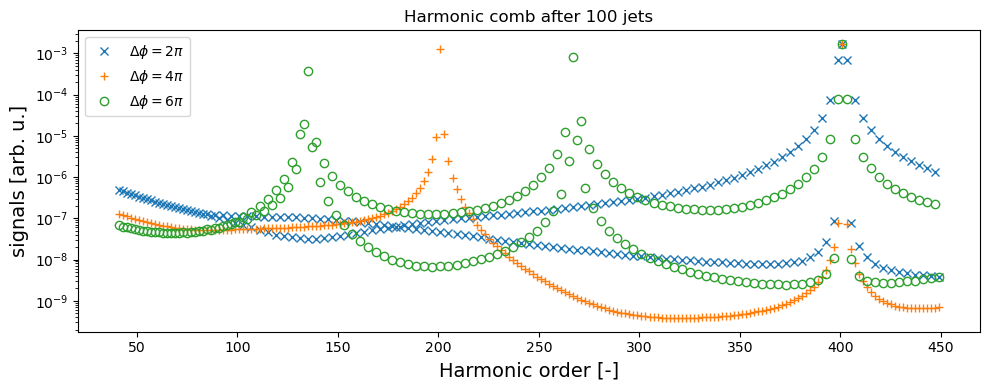

c:\git\qpm-code\Article Jupyter\XUV_signal_computation2.py:97: RuntimeWarning: divide by zero encountered in divide
  L_coh = np.abs(np.pi/delta_k1)


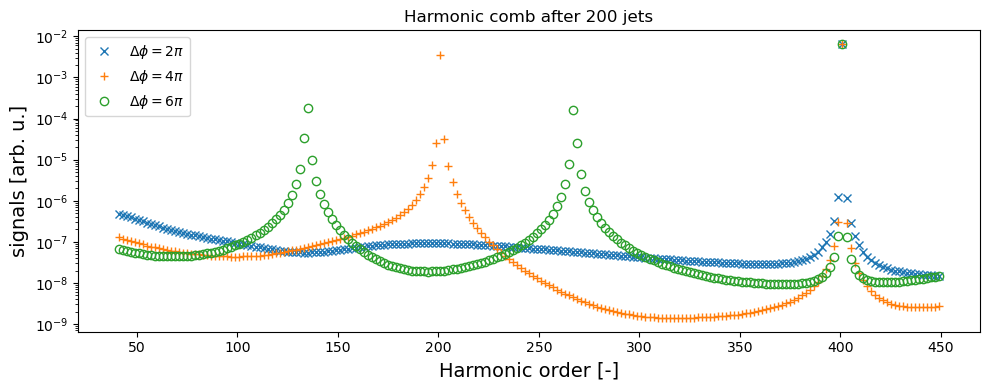

In [6]:
# harmonic combs
Hgrid_plot = np.arange(41,451,2)
M_plot = [67, 100, 200]


for k1 in range(len(M_plot)):
    fig, ax = plt.subplots(figsize=(10,4))
    ax.set_xlabel("Harmonic order [-]", fontsize=14)
    ax.set_ylabel("signals [arb. u.]", fontsize=14)

    ax.semilogy(Hgrid_plot, XUV_sig.periodic_medium_signal(pressure, zeta_opt, l1, xi_opt, eta_gen, Hgrid_plot, M_plot[k1], parameters)[1]/sig_norm , 'x',
                label = r'$\Delta \phi = 2\pi$')
    ax.semilogy(Hgrid_plot, XUV_sig.periodic_medium_signal(pressure, zeta_opt, l1, xi_opt2, eta_gen, Hgrid_plot, M_plot[k1], parameters)[1]/sig_norm , '+',
                label = r'$\Delta \phi = 4\pi$')
    ax.semilogy(Hgrid_plot, XUV_sig.periodic_medium_signal(pressure, zeta_opt, l1, xi_opt3, eta_gen, Hgrid_plot, M_plot[k1], parameters)[1]/sig_norm , 'o', mfc='none',
                label = r'$\Delta \phi = 6\pi$')
    ax.set_title('Harmonic comb after '+str(M_plot[k1])+' jets')

    plt.legend(loc='upper left')

    plt.tight_layout()
    fig.savefig('Harmonic_combs_'+str(k1)+'.pdf')
    plt.show()

These results are consistent with the thory introduced in the main manuscript. The monochromatisation is reached faster with higher phase-jumps, but more maxima appear within the harmonic comb. Combining these results with the signal build-up from the first figure in this section, we find that more distant harmonics form the optimised one are suppressed faster. It means that  we can use this scheme with lower number of periods to enhence more harmonic in a given spectral region.

Finally, we synthetise the previous analyses. We show the build-up of the signal for the whole harmonic comb with incerasing the number of periods.

c:\git\qpm-code\Article Jupyter\XUV_signal_computation2.py:97: RuntimeWarning: divide by zero encountered in scalar divide
  L_coh = np.abs(np.pi/delta_k1)


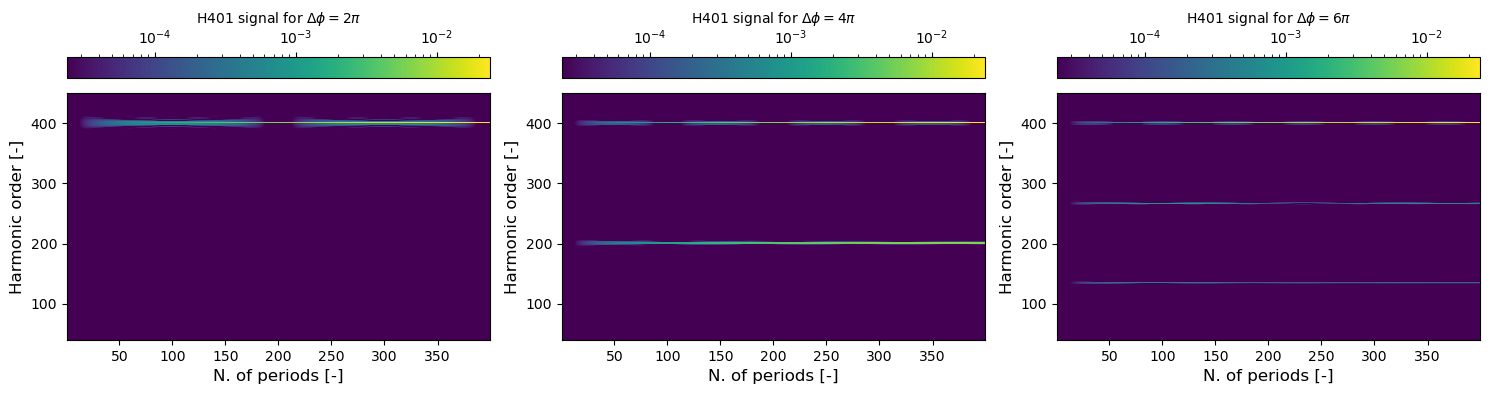

In [7]:
Hgrid_plot = np.arange(41,451,2)
M_plot = np.arange(1,400) # [67, 100, 200]

# harmonic order - n. of periods

signals=np.zeros((len(Hgrid_plot),len(M_plot)))

for k1 in range(len(Hgrid_plot)):
    signals[k1,:] = XUV_sig.periodic_medium_signal(pressure, zeta_opt, l1, xi_opt, eta_gen, Hgrid_plot[k1], M_plot, parameters)[1]

signals /= sig_norm

import matplotlib.colors as colors

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,4))
# im = ax[0].pcolormesh(M_plot, Hgrid_plot, signals)
im = ax[0].pcolormesh(M_plot, Hgrid_plot, signals, norm=colors.LogNorm(vmin=1e-3*signals.max(), vmax=signals.max()))
ax[0].set_xlabel(r"N. of periods [-]", fontsize=14)
ax[0].set_ylabel(r"Harmonic order [-]", fontsize=14)
cbar = plt.colorbar(im, ax=ax[0],orientation='horizontal',location='top')
cbar.set_label('H'+str(H_opt)+r' signal for $\Delta \phi = 2\pi$')



for k1 in range(len(Hgrid_plot)):
    signals[k1,:] = XUV_sig.periodic_medium_signal(pressure, zeta_opt, l1, xi_opt2, eta_gen, Hgrid_plot[k1], M_plot, parameters)[1]

signals /= sig_norm

# im = ax[1].pcolormesh(M_plot, Hgrid_plot, signals)
im = ax[1].pcolormesh(M_plot, Hgrid_plot, signals, norm=colors.LogNorm(vmin=1e-3*signals.max(), vmax=signals.max()))
ax[1].set_xlabel(r"N. of periods [-]", fontsize=14)
ax[1].set_ylabel(r"Harmonic order [-]", fontsize=14)
cbar = plt.colorbar(im, ax=ax[1],orientation='horizontal',location='top')
cbar.set_label('H'+str(H_opt)+r' signal for $\Delta \phi = 4\pi$')

for k1 in range(len(Hgrid_plot)):
    signals[k1,:] = XUV_sig.periodic_medium_signal(pressure, zeta_opt, l1, xi_opt3, eta_gen, Hgrid_plot[k1], M_plot, parameters)[1]

signals /= sig_norm 
# im = ax[2].pcolormesh(M_plot, Hgrid_plot, signals, norm=colors.LogNorm(vmin=signals.min(), vmax=signals.max()))
im = ax[2].pcolormesh(M_plot, Hgrid_plot, signals, norm=colors.LogNorm(vmin=1e-3*signals.max(), vmax=signals.max()))
ax[2].set_xlabel(r"N. of periods [-]", fontsize=14)
ax[2].set_ylabel(r"Harmonic order [-]", fontsize=14)
cbar = plt.colorbar(im, ax=ax[2],orientation='horizontal',location='top')
cbar.set_label('H'+str(H_opt)+r' signal for $\Delta \phi = 6\pi$')

plt.tight_layout()
fig.savefig('Harmonic_comb_evolution.pdf')
plt.show()


Here, we narrow the number of shown harmonics to see the harmonic comb in the vicinity of H400.

c:\git\qpm-code\Article Jupyter\XUV_signal_computation2.py:97: RuntimeWarning: divide by zero encountered in scalar divide
  L_coh = np.abs(np.pi/delta_k1)


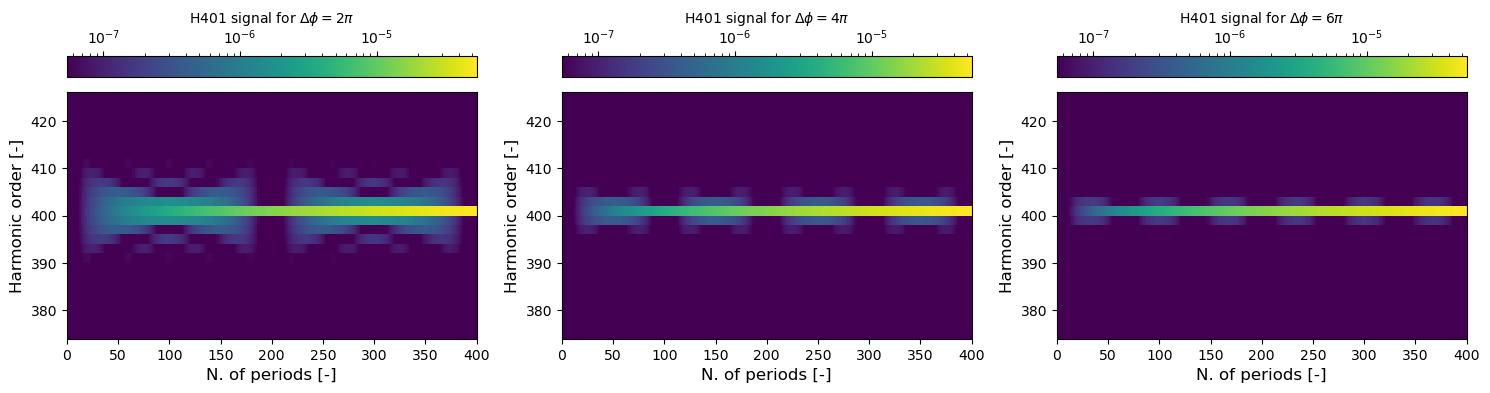

In [8]:
Hgrid_plot = np.arange(375,426,2) # np.arange(375,426,2)
M_plot = np.arange(1,400,2) # [67, 100, 200]

# harmonic order - n. of periods

signals=np.zeros((len(Hgrid_plot),len(M_plot)))

for k1 in range(len(Hgrid_plot)):
    signals[k1,:] = XUV_sig.periodic_medium_signal(pressure, zeta_opt, l1, xi_opt, eta_gen, Hgrid_plot[k1], M_plot, parameters)[1]


fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,4))
# im = ax[0].pcolormesh(M_plot, Hgrid_plot, signals)
im = ax[0].pcolormesh(M_plot, Hgrid_plot, signals, norm=colors.LogNorm(vmin=1e-3*signals.max(), vmax=signals.max()))
ax[0].set_xlabel(r"N. of periods [-]", fontsize=12)
ax[0].set_ylabel(r"Harmonic order [-]", fontsize=12)
cbar = plt.colorbar(im, ax=ax[0],orientation='horizontal',location='top')
cbar.set_label('H'+str(H_opt)+r' signal for $\Delta \phi = 2\pi$')



for k1 in range(len(Hgrid_plot)):
    signals[k1,:] = XUV_sig.periodic_medium_signal(pressure, zeta_opt, l1, xi_opt2, eta_gen, Hgrid_plot[k1], M_plot, parameters)[1]

# im = ax[1].pcolormesh(M_plot, Hgrid_plot, signals)
im = ax[1].pcolormesh(M_plot, Hgrid_plot, signals, norm=colors.LogNorm(vmin=1e-3*signals.max(), vmax=signals.max()))
ax[1].set_xlabel(r"N. of periods [-]", fontsize=12)
ax[1].set_ylabel(r"Harmonic order [-]", fontsize=12)
cbar = plt.colorbar(im, ax=ax[1],orientation='horizontal',location='top')
cbar.set_label('H'+str(H_opt)+r' signal for $\Delta \phi = 4\pi$')

for k1 in range(len(Hgrid_plot)):
    signals[k1,:] = XUV_sig.periodic_medium_signal(pressure, zeta_opt, l1, xi_opt3, eta_gen, Hgrid_plot[k1], M_plot, parameters)[1]

# im = ax[2].pcolormesh(M_plot, Hgrid_plot, signals, norm=colors.LogNorm(vmin=signals.min(), vmax=signals.max()))
im = ax[2].pcolormesh(M_plot, Hgrid_plot, signals, norm=colors.LogNorm(vmin=1e-3*signals.max(), vmax=signals.max()))
ax[2].set_xlabel(r"N. of periods [-]", fontsize=12)
ax[2].set_ylabel(r"Harmonic order [-]", fontsize=12)
cbar = plt.colorbar(im, ax=ax[2],orientation='horizontal',location='top')
cbar.set_label('H'+str(H_opt)+r' signal for $\Delta \phi = 6\pi$')

plt.tight_layout()
fig.savefig('Harmonic_comb_evolution2.pdf')
plt.show()

The selection mechanism is faster with incereasing $\Delta \phi$ as expected. There is also seen the signal of the neighbouring harmonics. The number of minima of the signal increases with the difference $\Delta q$.

## Stability study
Finally, we introduce the sensitivity to pressure, ionisation and the geometric phase.

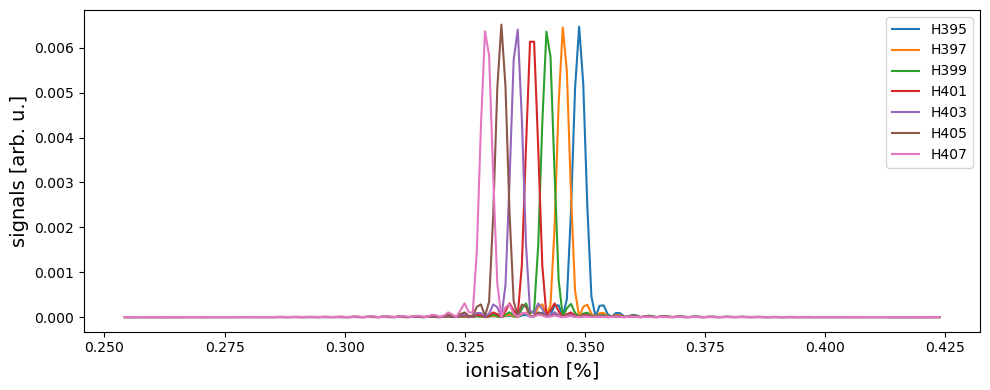

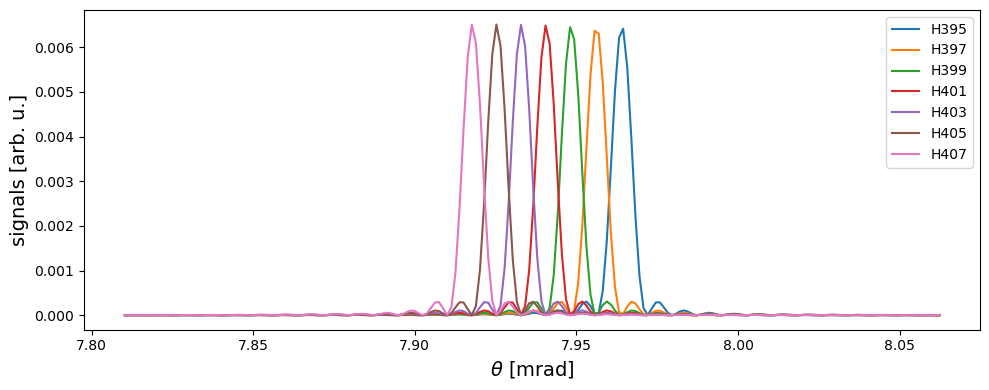

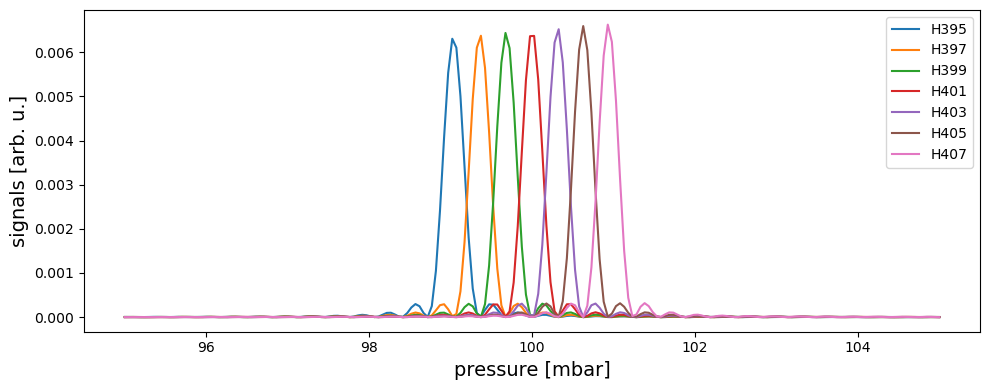

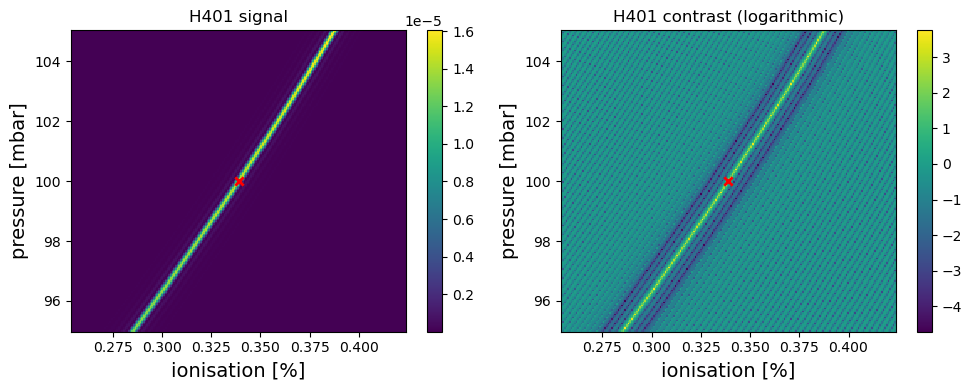

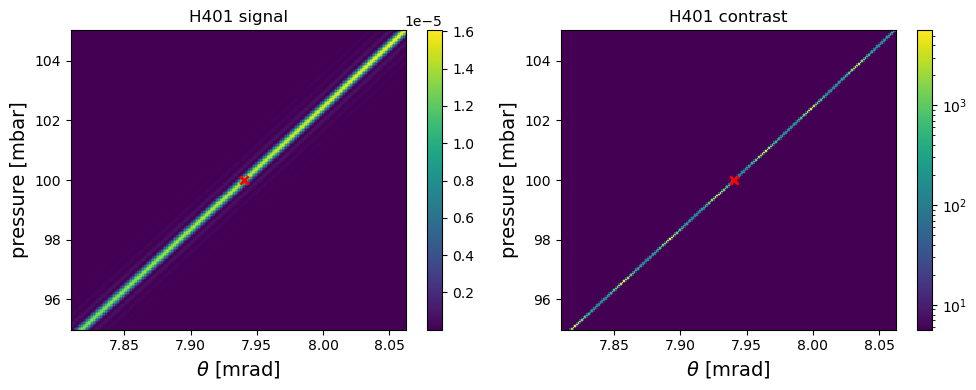

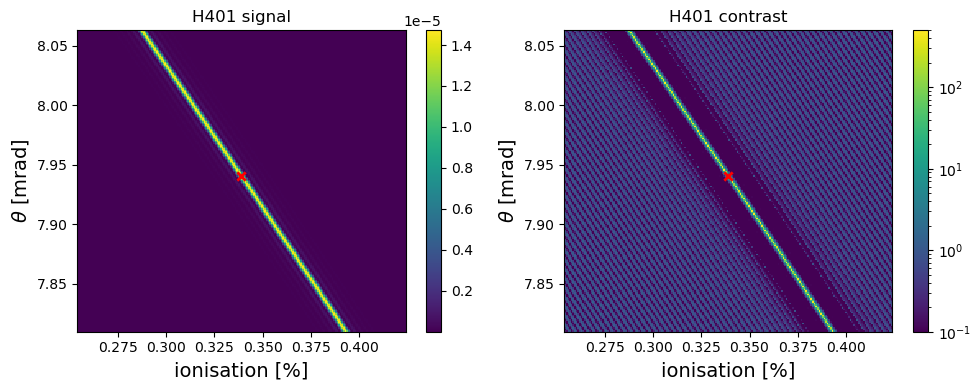

In [9]:
M_plot = 200

geom_plot = 'theta'

## grids of parameters
# zeta_grid = np.linspace(1.56e-4,1.59e-4,250)
# pressure_grid = np.linspace(495e-3,505e-3,200)
# eta_grid = np.linspace(0.95*eta_gen,1.05*eta_gen,200)
zeta_grid = np.linspace(3.05e-5,3.25e-5,200)
pressure_grid = np.linspace(95e-3,105e-3,200)
eta_grid = np.linspace(0.75*eta_gen,1.25*eta_gen,200)

# harmonics of the interest on the grids
fig, ax = plt.subplots(figsize=(10,4))
ax.set_xlabel("ionisation [%]", fontsize=14)
ax.set_ylabel("signals [arb. u.]", fontsize=14)
for k1 in range(len(H_interest)):
    ax.plot(1e2*eta_grid, XUV_sig.periodic_medium_signal(pressure, zeta_opt, l1, xi_opt, eta_grid, H_interest[k1], M_plot, parameters)[1]/sig_norm,
            label= r"H"+str(H_interest[k1]))
plt.legend()
plt.tight_layout()
fig.savefig('Signals_stability_eta.pdf')
plt.show()

fig, ax = plt.subplots(figsize=(10,4))
if (geom_plot == 'theta'): ax.set_xlabel(r"$\theta$ [mrad]", fontsize=14)
else: ax.set_xlabel(r"$\zeta$ [-]", fontsize=14)
ax.set_ylabel("signals [arb. u.]", fontsize=14)

for k1 in range(len(H_interest)):
    if (geom_plot == 'theta'):
        ax.plot(1e3*XUV_sig.zeta2theta(zeta_grid), XUV_sig.periodic_medium_signal(pressure, zeta_grid, l1, xi_opt, eta_gen, H_interest[k1], M_plot, parameters)[1]/sig_norm,
            label= r"H"+str(H_interest[k1]))
    else:
        ax.plot(zeta_grid, XUV_sig.periodic_medium_signal(pressure, zeta_grid, l1, xi_opt, eta_gen, H_interest[k1], M_plot, parameters)[1]/sig_norm,
                label= r"H"+str(H_interest[k1]))

plt.legend()

plt.tight_layout()
fig.savefig('Signals_stability_theta.pdf')
plt.show()

fig, ax = plt.subplots(figsize=(10,4))
ax.set_xlabel("pressure [mbar]", fontsize=14)
ax.set_ylabel("signals [arb. u.]", fontsize=14)
for k1 in range(len(H_interest)):
    ax.plot(1e3*pressure_grid, XUV_sig.periodic_medium_signal(pressure_grid, zeta_opt, l1, xi_opt, eta_gen, H_interest[k1], M_plot, parameters)[1]/sig_norm,
            label= r"H"+str(H_interest[k1]))
plt.legend()

plt.tight_layout()
fig.savefig('Signals_stability_pressure.pdf')
plt.show()


# 2D- plots
# pressure-ionisation
signals = []
for k1 in range(len(H_interest)):
    signals.append(np.zeros((len(pressure_grid),len(eta_grid))))
    for k2 in range(len(pressure_grid)):
        signals[k1][k2,:] = XUV_sig.periodic_medium_signal(pressure_grid[k2], zeta_opt, l1, xi_opt, eta_grid, H_interest[k1], M_plot, parameters)[1]


fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
im = ax[0].pcolormesh(1e2*eta_grid, 1e3*pressure_grid, signals[H_interest.index(H_opt)])
ax[0].set_ylabel("pressure [mbar]", fontsize=14)
ax[0].set_xlabel("ionisation [%]", fontsize=14)
ax[0].set_title('H'+str(H_opt)+' signal')
plt.colorbar(im, ax=ax[0])


im = ax[1].pcolormesh(1e2*eta_grid, 1e3*pressure_grid,
                 np.log10(XUV_sig.monochrom_function(H_interest,signals,H_opt,H_compare, metric = 'max'))) #signals[H_interest.index(H_opt)])
ax[1].set_ylabel("pressure [mbar]", fontsize=14)
ax[1].set_xlabel("ionisation [%]", fontsize=14)
ax[1].set_title('H'+str(H_opt)+' contrast (logarithmic)')
plt.colorbar(im, ax=ax[1])

ax[0].scatter(1e2*eta_gen, 1e3*pressure, c='r',marker='x',linewidths=2)
ax[1].scatter(1e2*eta_gen, 1e3*pressure, c='r',marker='x',linewidths=2)

plt.tight_layout()
fig.savefig('Signals_stability_eta-pressure.pdf')
plt.show()


# pressure-zeta
signals = []
for k1 in range(len(H_interest)):
    signals.append(np.zeros((len(pressure_grid),len(zeta_grid))))
    for k2 in range(len(pressure_grid)):
        signals[k1][k2,:] = XUV_sig.periodic_medium_signal(pressure_grid[k2], zeta_grid, l1, xi_opt, eta_gen, H_interest[k1], M_plot, parameters)[1]


fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
if (geom_plot == 'theta'): im = ax[0].pcolormesh(1e3*XUV_sig.zeta2theta(zeta_grid), 1e3*pressure_grid, signals[H_interest.index(H_opt)])
else: im = ax[0].pcolormesh(zeta_grid, 1e3*pressure_grid, signals[H_interest.index(H_opt)])
ax[0].set_ylabel("pressure [mbar]", fontsize=14)
if (geom_plot == 'theta'): ax[0].set_xlabel(r"$\theta$ [mrad]", fontsize=14)
else: ax[0].set_xlabel(r"$\zeta$ [-]", fontsize=14)
ax[0].set_title('H'+str(H_opt)+' signal')
plt.colorbar(im, ax=ax[0])


arr_plot = XUV_sig.monochrom_function(H_interest,signals,H_opt,H_compare, metric = 'max')
if (geom_plot == 'theta'):
    im = ax[1].pcolormesh(1e3*XUV_sig.zeta2theta(zeta_grid), 1e3*pressure_grid, arr_plot,
                        norm=colors.LogNorm(vmin=1e-3*arr_plot.max(), vmax=arr_plot.max())) #signals[H_interest.index(H_opt)])
else:
    im = ax[1].pcolormesh(zeta_grid, 1e3*pressure_grid, arr_plot,
                        norm=colors.LogNorm(vmin=1e-3*arr_plot.max(), vmax=arr_plot.max())) #signals[H_interest.index(H_opt)])
ax[1].set_ylabel("pressure [mbar]", fontsize=14)
if (geom_plot == 'theta'): ax[1].set_xlabel(r"$\theta$ [mrad]", fontsize=14)
else: ax[1].set_xlabel(r"$\zeta$ [-]", fontsize=14)
ax[1].set_title('H'+str(H_opt)+' contrast')
plt.colorbar(im, ax=ax[1])


if (geom_plot == 'theta'):
    ax[0].scatter(1e3*XUV_sig.zeta2theta(zeta_opt), 1e3*pressure, c='r',marker='x',linewidths=2)
    ax[1].scatter(1e3*XUV_sig.zeta2theta(zeta_opt), 1e3*pressure, c='r',marker='x',linewidths=2)
else:
    ax[0].scatter(zeta_opt, 1e3*pressure, c='r',marker='x',linewidths=2)
    ax[1].scatter(zeta_opt, 1e3*pressure, c='r',marker='x',linewidths=2)

plt.tight_layout()
fig.savefig('Signals_stability_pressure-zeta.pdf')
plt.show()


# zeta-ionisation
signals = []
for k1 in range(len(H_interest)):
    signals.append(np.zeros((len(zeta_grid),len(eta_grid))))
    for k2 in range(len(zeta_grid)):
        signals[k1][k2,:] = XUV_sig.periodic_medium_signal(pressure, zeta_grid[k2], l1, xi_opt, eta_grid, H_interest[k1], M_plot, parameters)[1]


fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
if (geom_plot == 'theta'):
    im = ax[0].pcolormesh(1e2*eta_grid, 1e3*XUV_sig.zeta2theta(zeta_grid), signals[H_interest.index(H_opt)])
else:
    im = ax[0].pcolormesh(1e2*eta_grid, zeta_grid, signals[H_interest.index(H_opt)])
if (geom_plot == 'theta'): ax[0].set_ylabel(r"$\theta$ [mrad]", fontsize=14)
else: ax[0].set_ylabel(r"$\zeta$ [-]", fontsize=14)
ax[0].set_xlabel("ionisation [%]", fontsize=14)
ax[0].set_title('H'+str(H_opt)+' signal')
plt.colorbar(im, ax=ax[0])


arr_plot = XUV_sig.monochrom_function(H_interest,signals,H_opt,H_compare, metric = 'max')
max_contrast_plot = 5*1e2
min_contrast_plot = 0.1
if (geom_plot == 'theta'):
    im = ax[1].pcolormesh(1e2*eta_grid, 1e3*XUV_sig.zeta2theta(zeta_grid), arr_plot,
                          norm=colors.LogNorm(vmin=min_contrast_plot, vmax=max_contrast_plot))
                          # vmin=min_contrast_plot, vmax=max_contrast_plot)
else:
    im = ax[1].pcolormesh(1e2*eta_grid, zeta_grid, arr_plot,
                          norm=colors.LogNorm(vmin=min_contrast_plot, vmax=max_contrast_plot))
                        #   vmin=min_contrast_plot, vmax=max_contrast_plot)
                #   norm=colors.LogNorm(vmin=min_contrast_plot, vmax=max_contrast_plot))
                #  np.log10(XUV_sig.monochrom_function(H_interest,signals,H_opt,H_compare, metric = 'max'))) #signals[H_interest.index(H_opt)])
if (geom_plot == 'theta'): ax[1].set_ylabel(r"$\theta$ [mrad]", fontsize=14)
else: ax[1].set_ylabel(r"$\zeta$ [-]", fontsize=14)
ax[1].set_xlabel("ionisation [%]", fontsize=14)
ax[1].set_title('H'+str(H_opt)+' contrast')
plt.colorbar(im, ax=ax[1])

if (geom_plot == 'theta'):
    ax[0].scatter(1e2*eta_gen, 1e3*XUV_sig.zeta2theta(zeta_opt),c='r',marker='x',linewidths=2)
    ax[1].scatter(1e2*eta_gen, 1e3*XUV_sig.zeta2theta(zeta_opt),c='r',marker='x',linewidths=2)
else:
    ax[0].scatter(1e2*eta_gen, zeta_opt,c='r',marker='x',linewidths=2)
    ax[1].scatter(1e2*eta_gen, zeta_opt,c='r',marker='x',linewidths=2)

plt.tight_layout()
fig.savefig('Signals_stability_eta-zeta.pdf')
plt.show()

## Enhanced spectral region

Since the optimising window is very narrow, we can be interested in the spectral bandwidth of enhanced harmonics. We illustrate it by considering the ionisation as the parameter with its own distribution around the optimal value.

First, there are contrasts of a given spectral region defined as 

$$
    \tilde{C}_1
    =
    \frac{\sum_{i=391}^{411}S_{i}}{\sum_{i=351}^{389}S_{i} + \sum_{i=413}^{451}S_{i}}
    \,, \quad
    \tilde{C}_2
    =
    \frac{\sum_{i=391}^{411}S_{i}}{\sum_{i=351}^{451}S_{i}} \,.
$$


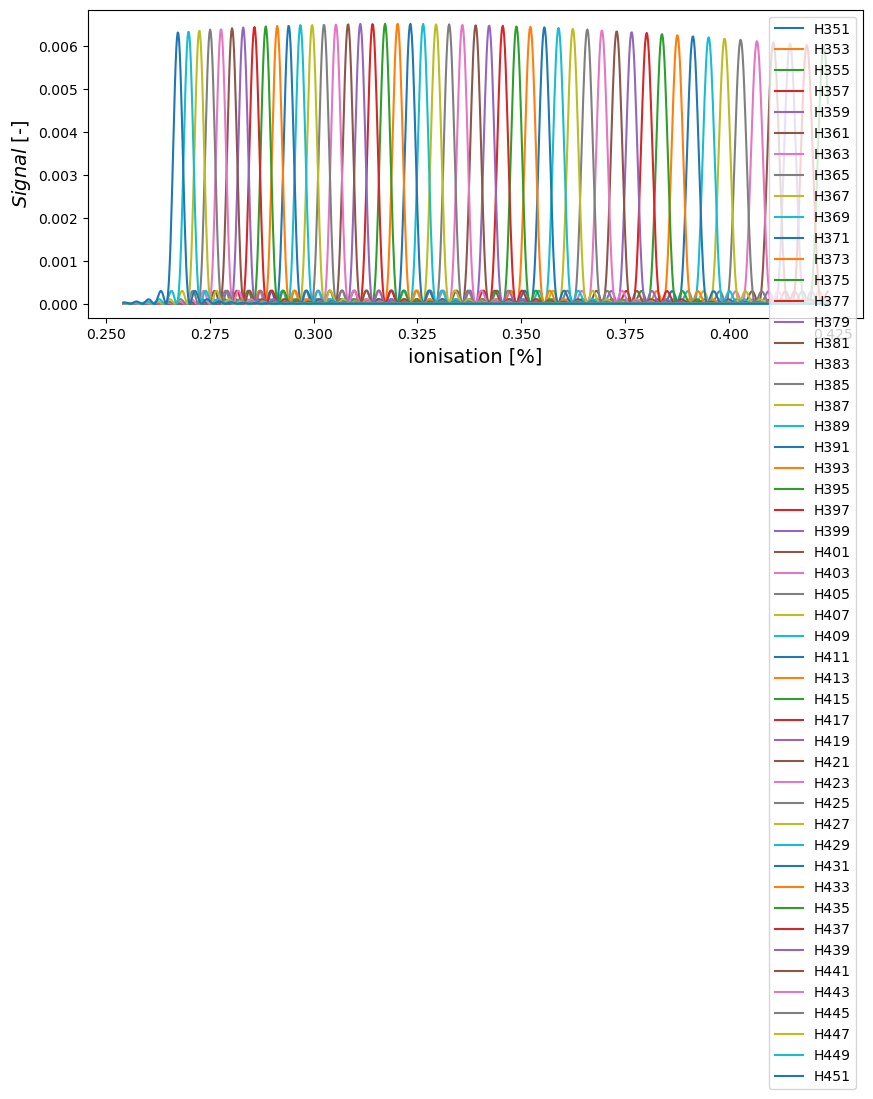

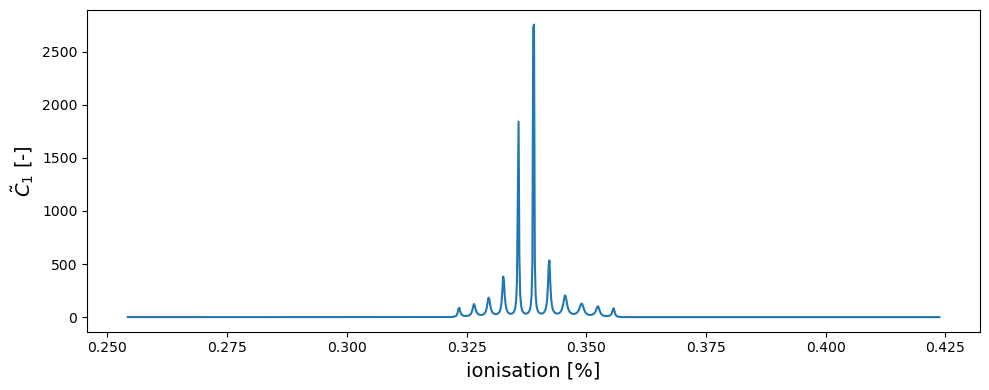

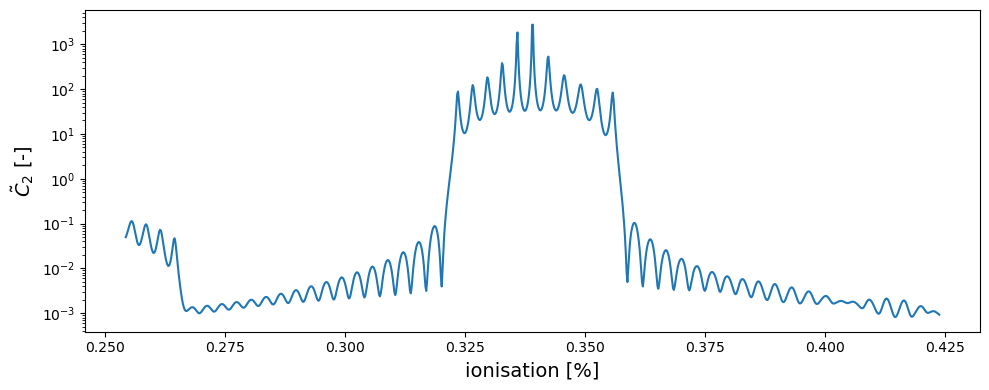

In [10]:
eta_grid = np.linspace(0.75*eta_gen,1.25*eta_gen,1000)

H_interest = list(range(H_opt-50,H_opt+51,2))
H_sel = list(range(H_opt-10,H_opt+11,2))

H_compare = copy.deepcopy(H_interest)
for H_del in H_sel: H_compare.remove(H_del)

signals = []

for k1 in range(len(H_interest)):
    signals.append(XUV_sig.periodic_medium_signal(pressure, zeta_opt, l1, xi_opt, eta_grid, H_interest[k1], M_plot, parameters)[1])

contrast_sum = 0
for H_dum in H_sel: contrast_sum += XUV_sig.monochrom_function(H_interest,signals,H_dum,H_compare, metric = 'sum')

contrast_sum2 = 0
for H_dum in H_sel: contrast_sum2 += XUV_sig.monochrom_function(H_interest,signals,H_dum,H_interest, metric = 'sum')


fig, ax = plt.subplots(figsize=(10,4))
ax.set_xlabel("ionisation [%]", fontsize=14)
ax.set_ylabel(r"$Signal$ [-]", fontsize=14)
for k1 in range(len(H_interest)):
    ax.plot(1e2*eta_grid, XUV_sig.periodic_medium_signal(pressure, zeta_opt, l1, xi_opt, eta_grid, H_interest[k1], M_plot, parameters)[1]/sig_norm,
            label= r"H"+str(H_interest[k1]))
plt.legend()
# plt.tight_layout()


fig, ax = plt.subplots(figsize=(10,4))
ax.set_xlabel("ionisation [%]", fontsize=14)
ax.set_ylabel(r"$\tilde{C}_1$ [-]", fontsize=14)
ax.plot(1e2*eta_grid, contrast_sum)
# plt.legend()
plt.tight_layout()
plt.show()

fig, ax = plt.subplots(figsize=(10,4))
ax.set_xlabel("ionisation [%]", fontsize=14)
ax.set_ylabel(r"$\tilde{C}_2$ [-]", fontsize=14)
ax.semilogy(1e2*eta_grid, contrast_sum)
# plt.legend()
plt.tight_layout()
plt.show()

Second, we try to estimate the bandwidth of the enhanced harmonics. It is inferred from the probabilistic approach. The signal $S^{(q)}$ gives the distribution of energy accross the harmonic orders in $q$. Furthermore, we consider the ionisation described by $\eta$, which is a *parameter* of $S^{(q)}$, as a random variable with *probability density function* $f(\eta)$. The distribution in the harmonic orders $q$ is then given by the *compound probability density function* $\mathcal{S}(q)=\int_{\Omega_\eta} S^{(q)}(\eta) f(\eta) \mathrm{d}\eta$.

We consider $\eta$ being normally distributed around $\eta_{\mathrm{gen}}$ with the *standard deviation* 0.025 %. The following figures show:
- the normal distribution of $\eta$;
- the joint distribution function in $q$ and $\eta$: $S^{(q)}(\eta) f(\eta)$;
- the compound distribution function $\mathcal{S}(q)$.

1595.7691216049934
7.244794398851768e-07
7.403654415358797e-07
7.438419713575585e-07


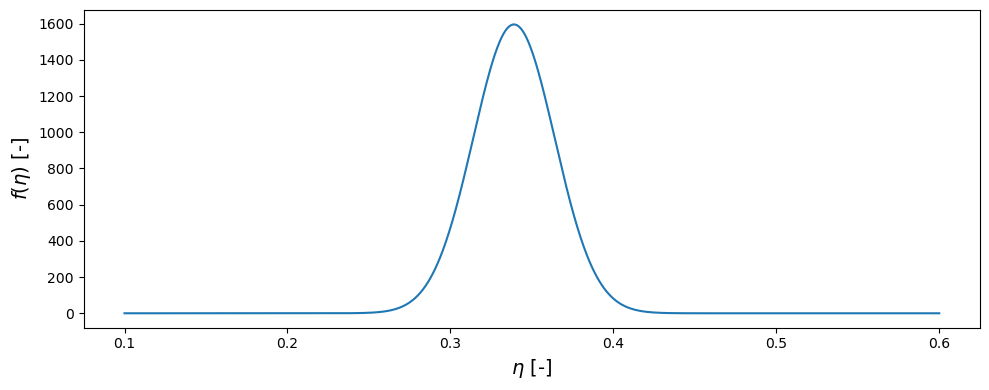

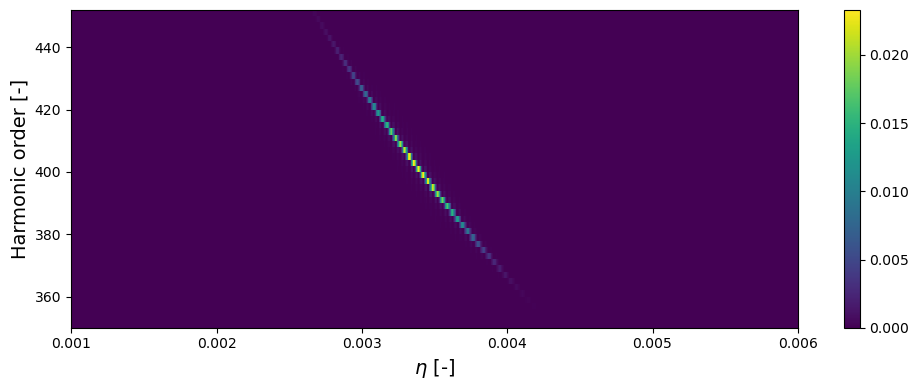

402.21572432934346
15.655228716539552
[4.01445164e+02 1.56199492e+01 2.90763448e-05]


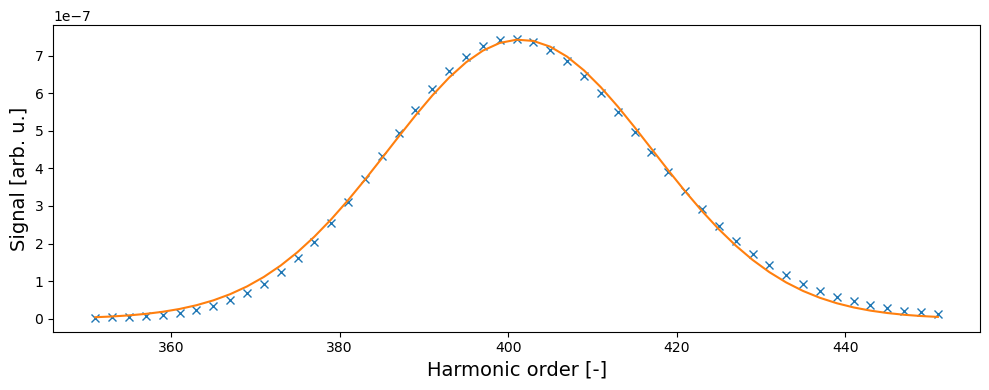

In [11]:
from functools import partial
import scipy.integrate
from scipy.stats import norm
import scipy.stats
from scipy.optimize import curve_fit

M_plot = 200
eta_down = 1e-2*0.1
eta_up = 1e-2*0.6
eta_grid = np.linspace(eta_down,eta_up,1000)


eta_distr = lambda eta: norm.pdf(eta,loc=eta_gen,scale=1e-2*0.025)
intens_distr_joint = lambda eta, H_foo: eta_distr(eta)*XUV_sig.periodic_medium_signal(pressure, zeta_opt, l1, xi_opt, eta, H_foo, M_plot, parameters)[1]
# intens_dist_compound = lambda H_foo: scipy.integrate.quadrature(lambda x: intens_distr_joint(x, H_foo), eta_down,eta_up, args=())
intens_dist_compound_f = lambda H_foo: scipy.integrate.trapezoid(intens_distr_joint(eta_grid, H_foo),eta_grid)
print(eta_distr(1e-2*0.339))

print(intens_dist_compound_f(397))
print(intens_dist_compound_f(399))
print(intens_dist_compound_f(401))

fig, ax = plt.subplots(figsize=(10,4))
ax.plot(1e2*eta_grid, eta_distr(eta_grid))
# plt.legend()
ax.set_xlabel(r"$\eta$ [-]", fontsize=14)
ax.set_ylabel(r"$f(\eta)$ [-]", fontsize=14)

plt.tight_layout()
plt.show()


# eta_grid = np.linspace(1e-2*0.250, 1e-2*0.425,500)
signals = np.zeros((len(H_interest),len(eta_grid)))
for k1 in range(len(H_interest)):
    for k2 in range(len(eta_grid)):
        signals[k1,k2] = intens_distr_joint(eta_grid[k2], H_interest[k1])

fig, ax = plt.subplots(figsize=(10,4))
im = ax.pcolormesh(eta_grid,H_interest,signals)
ax.set_xlabel(r"$\eta$ [-]", fontsize=14)
ax.set_ylabel(r"Harmonic order [-]", fontsize=14)
plt.colorbar(im, ax=ax)
plt.tight_layout()
plt.show()


intens_distr_compound = np.asarray([intens_dist_compound_f(H_interest[k1]) for k1 in range(len(H_interest))])

# expected value
H_grid = np.asarray(H_interest)
intens_distr_compound_norm = intens_distr_compound/np.sum(intens_distr_compound)

expval = np.sum(H_grid*intens_distr_compound_norm)
variance = np.sqrt(np.sum(intens_distr_compound_norm*((H_grid-expval)**2)))
print(expval)
print(variance)


fit_vals = curve_fit(lambda x,a,b,c: c*norm.pdf(x,loc=a,scale=b),H_grid,intens_distr_compound, p0=(400,25,7e-7))[0]
print(fit_vals)


fig, ax = plt.subplots(figsize=(10,4))
ax.plot(H_interest, intens_distr_compound, 'x')
ax.plot(H_interest, fit_vals[2]*norm.pdf(H_interest,loc=fit_vals[0],scale=fit_vals[1]))
ax.set_xlabel(r"Harmonic order [-]", fontsize=14)
ax.set_ylabel(r"Signal [arb. u.]", fontsize=14)
# plt.legend()
plt.tight_layout()
plt.show()
# XUV_sig.periodic_medium_signal(pressure, zeta_opt, l1, xi_opt, eta_grid, H_interest[k1], M_plot, parameters)[1]

We hcompute also the *standard deviation* of $\mathcal{S}(q)$: by definition and by fitting it with a normal distribution. In both cases, we retrieve the standard deviation $\sigma_q \approx 15$.

The conclusion is: If we have the stability of 0.025 % (measured in $\sigma$) in the ionisation, the enhanced region spans 30 harmonic orders, which corresponds to 15 enhanced odd harmonics in the harmonic comb.